In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Doc file du lieu 

In [381]:
df = pd.read_csv("heart(1).csv")

In [382]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [383]:
df.shape

(918, 12)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [385]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Tien xu ly va truc quan hoa du lieu

## Truc Quan hoa du lieu ban dau

## Truc quan hoa su tuong quan giua cac thuoc tinh khi chua tien xu ly

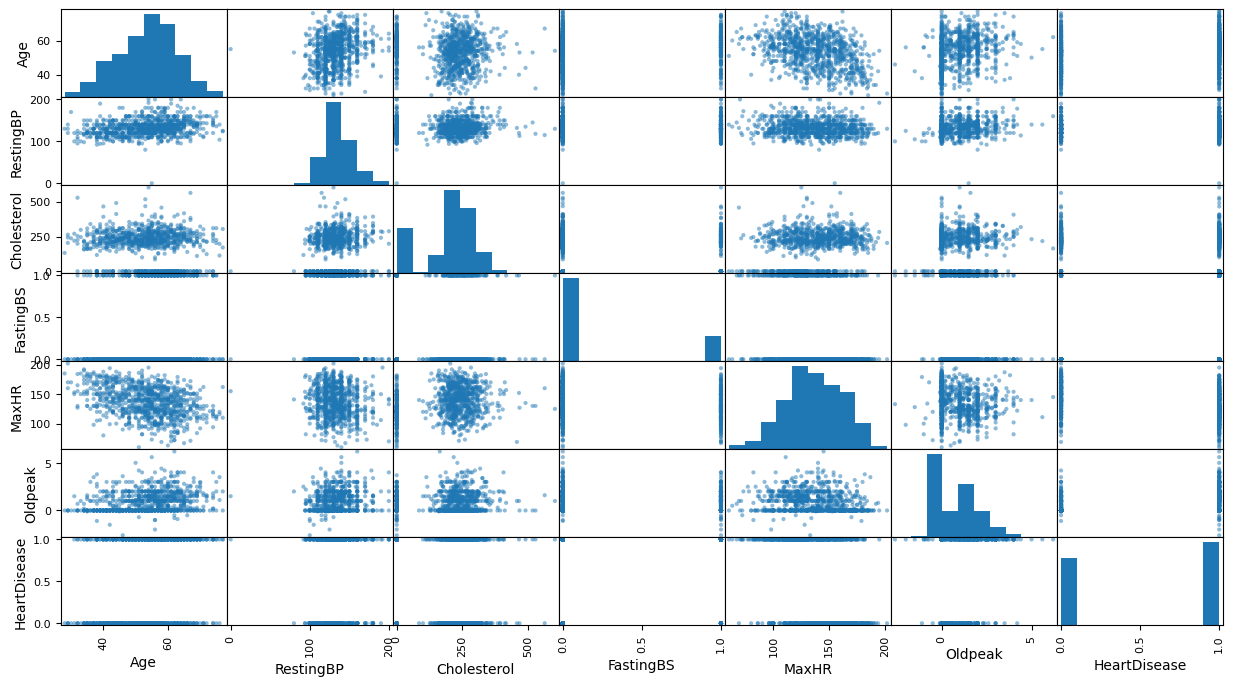

In [389]:
scatter_matrix(df,figsize=(15,8));

## Truc quan hoa bien muc tieu

In [391]:
df['HeartDisease'].value_counts().to_frame()

,count
HeartDisease,
1,508
0,410


In [392]:
df['HeartDisease'].value_counts(normalize=True).to_frame()

,proportion
HeartDisease,
1,0.553377
0,0.446623


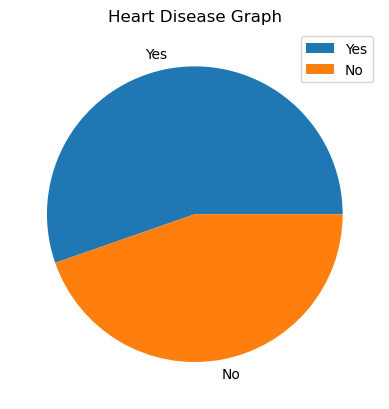

In [393]:
plt.pie(df['HeartDisease'].value_counts(normalize=True),labels=['Yes','No']);
plt.title("Heart Disease Graph")
plt.legend();

## Truc quan hoa bien roi rac

In [395]:
columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
for column in columns:
    print(column,":",df[column].unique())

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
FastingBS : [0 1]
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']
HeartDisease : [0 1]


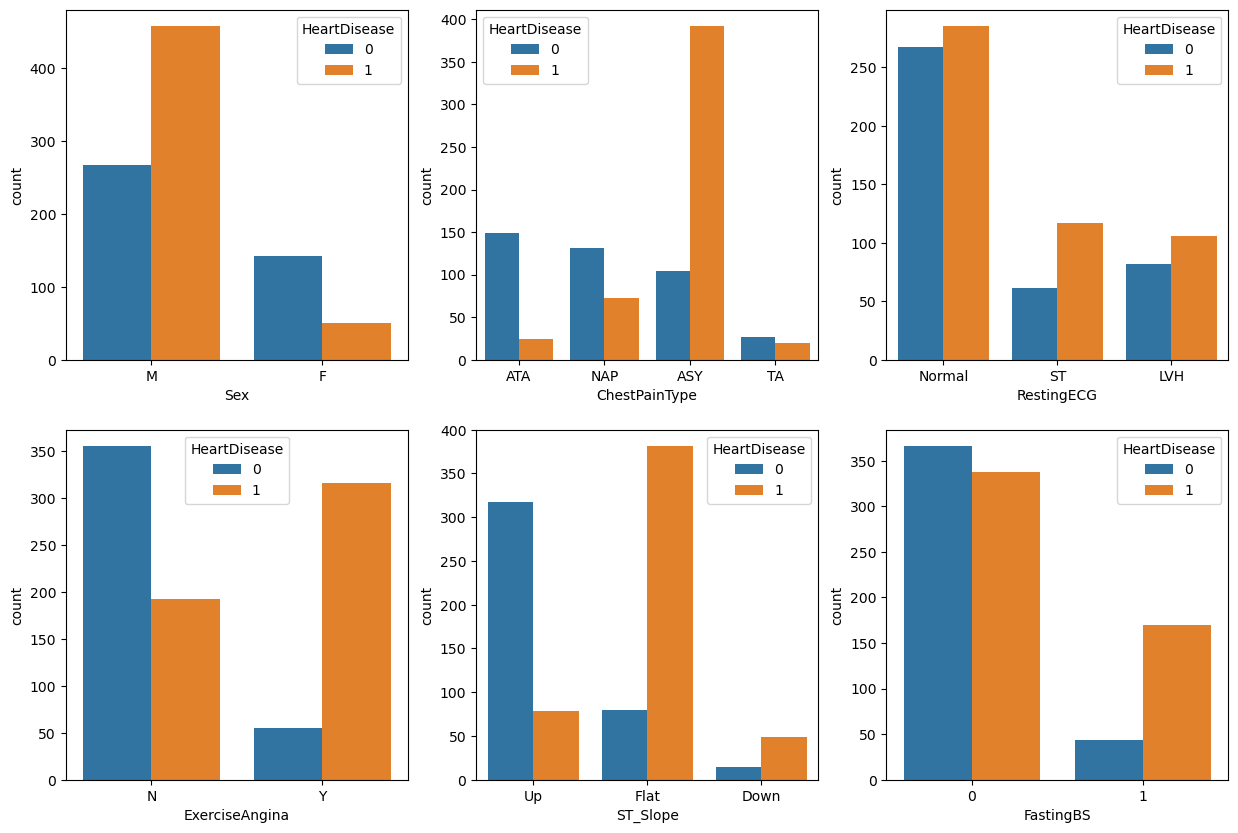

In [396]:
fig,axes = plt.subplots(2,3,figsize= (15,10))
sns.countplot(ax = axes[0,0], data = df, x = "Sex",hue = "HeartDisease")
sns.countplot(ax = axes[0,1], data = df, x = "ChestPainType",hue = "HeartDisease")
sns.countplot(ax = axes[0,2], data = df, x = "RestingECG",hue = "HeartDisease")
sns.countplot(ax = axes[1,0], data = df, x = "ExerciseAngina",hue = "HeartDisease")
sns.countplot(ax = axes[1,1], data = df, x = "ST_Slope",hue = "HeartDisease")
sns.countplot(ax = axes[1,2], data = df, x = "FastingBS",hue = "HeartDisease");
plt.show()

## Truc quan hoa bien lien tuc

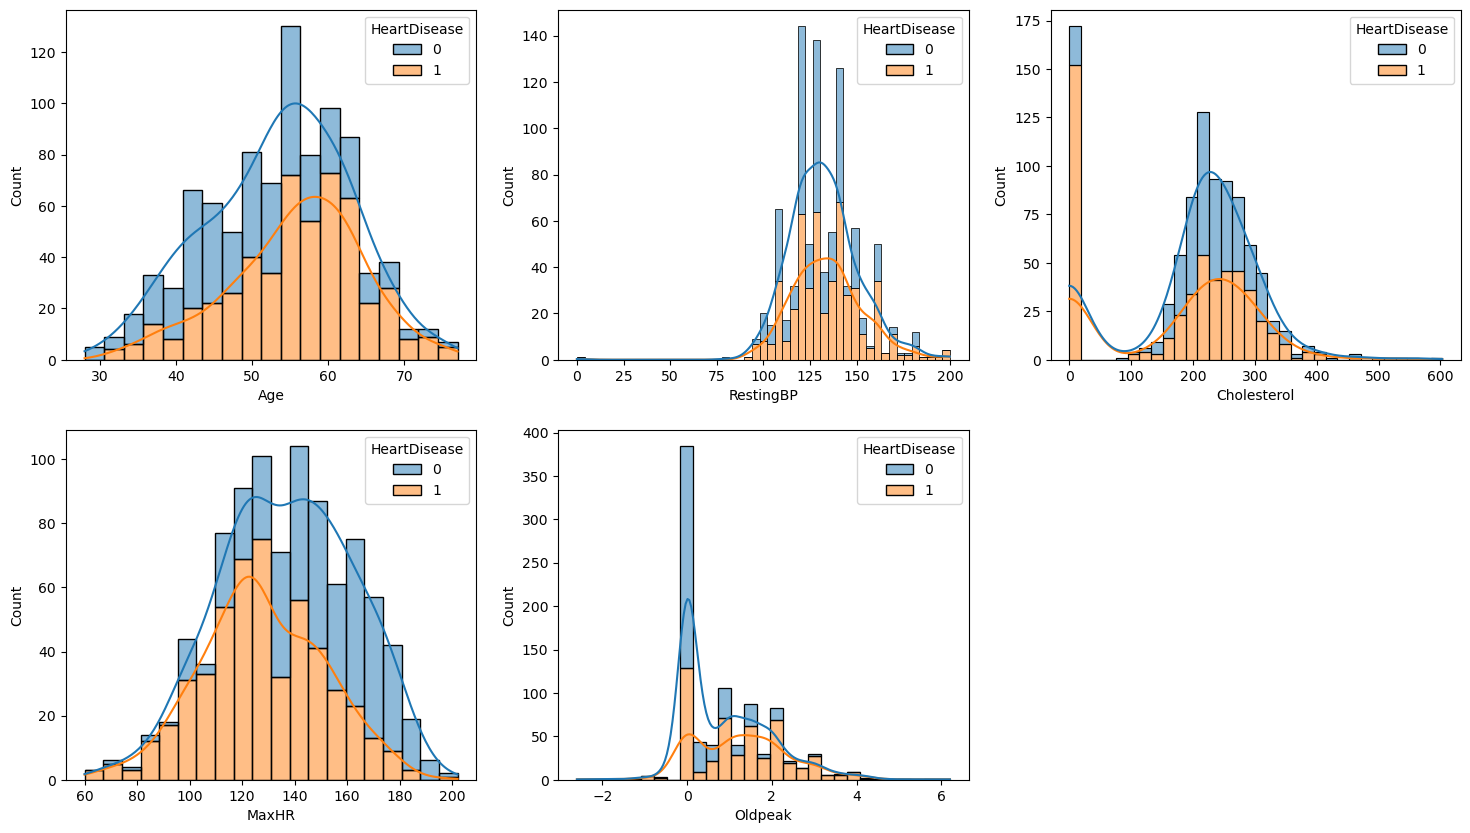

In [398]:
fig,axes = plt.subplots(2,3,figsize= (18,10))
sns.histplot(ax = axes[0,0], data = df, x = "Age",hue = "HeartDisease", multiple='stack',kde = True)
sns.histplot(ax = axes[0,1], data = df, x = "RestingBP",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[0,2], data = df, x = "Cholesterol",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,0], data = df, x = "MaxHR",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,1], data = df, x = "Oldpeak",hue = "HeartDisease",multiple='stack',kde = True);
axes.flat[-1].set_visible(False)
plt.show()

## Kiem tra du lieu thieu

In [400]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Kiem tra du lieu trung lap

In [402]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [403]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [404]:
df.shape

(918, 12)

## Truc quan hoa du lieu lien tuc de tim diem ngoai lai

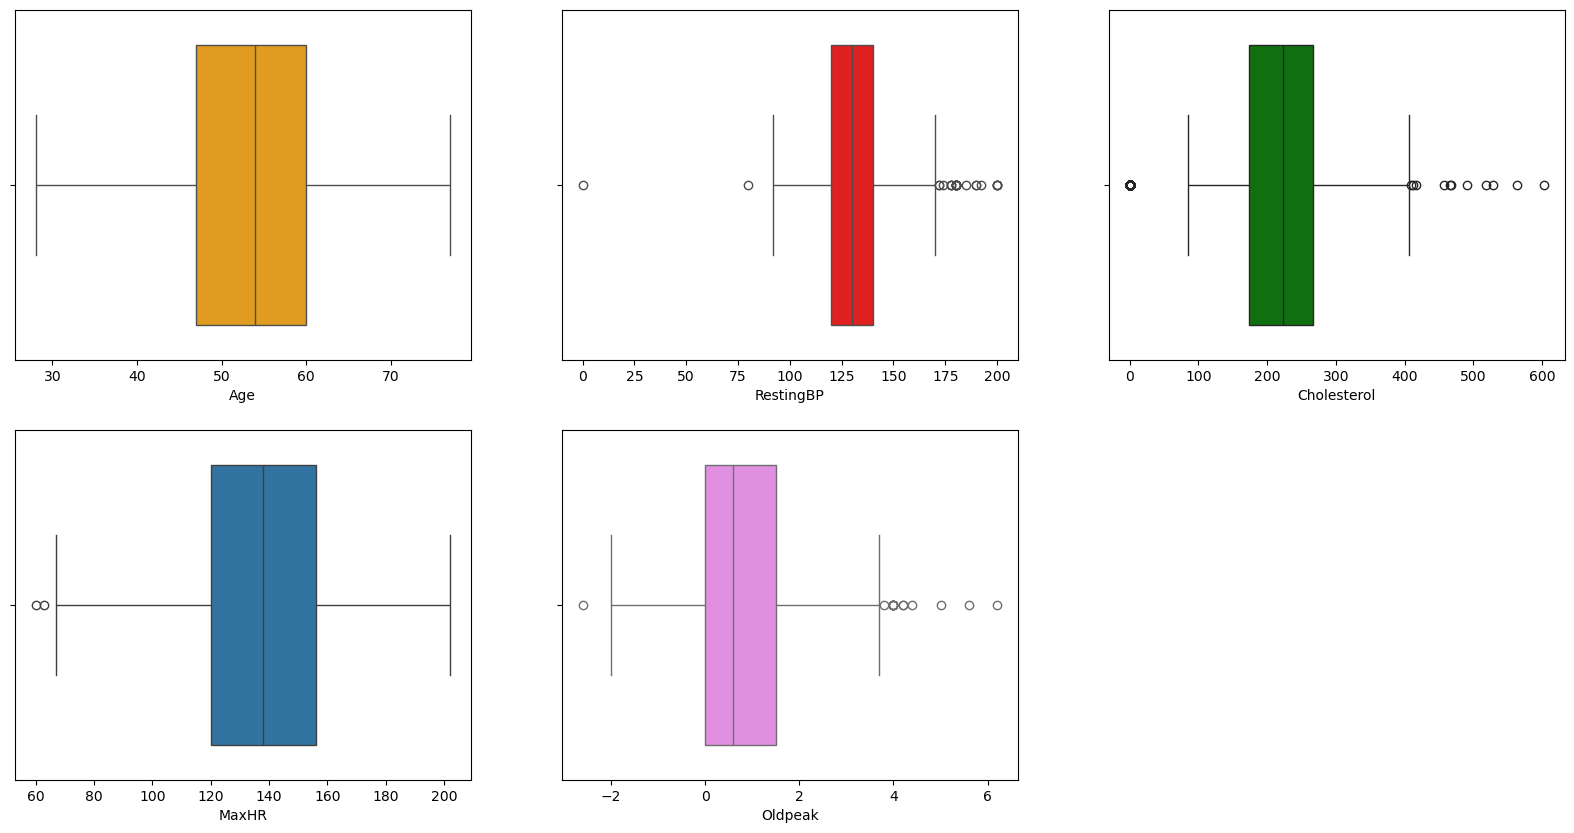

In [406]:
fig,axes = plt.subplots(2,3,figsize= (20,10))
sns.boxplot(ax = axes[0,0], data = df, x = "Age",color='orange')
sns.boxplot(ax = axes[0,1], data = df, x = "RestingBP",color='red')
sns.boxplot(ax = axes[0,2], data = df, x = "Cholesterol",color='green')
sns.boxplot(ax = axes[1,0], data = df, x = "MaxHR")
sns.boxplot(ax = axes[1,1], data = df, x = "Oldpeak",color='violet');
axes.flat[-1].set_visible(False)

### Xu ly diem ngoai lai cho cot Cholesterol

In [408]:
new_df = df.copy()

In [409]:
new_df.shape

(918, 12)

In [410]:
upper_limit = new_df['Cholesterol'].quantile(0.99)
lower_limit = new_df['Cholesterol'].quantile(0.1899)

In [411]:
upper_limit , lower_limit

(411.4900000000001, 101.38300000000015)

In [412]:
new_df = new_df.loc[(new_df['Cholesterol']<=upper_limit) & (new_df['Cholesterol']>=lower_limit)]

<Axes: ylabel='Cholesterol'>

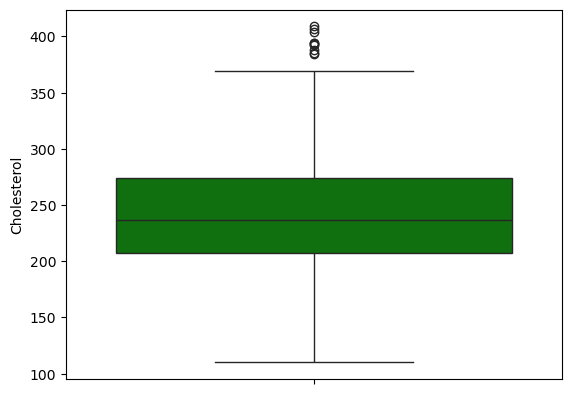

In [413]:
sns.boxplot(new_df["Cholesterol"],color='green')

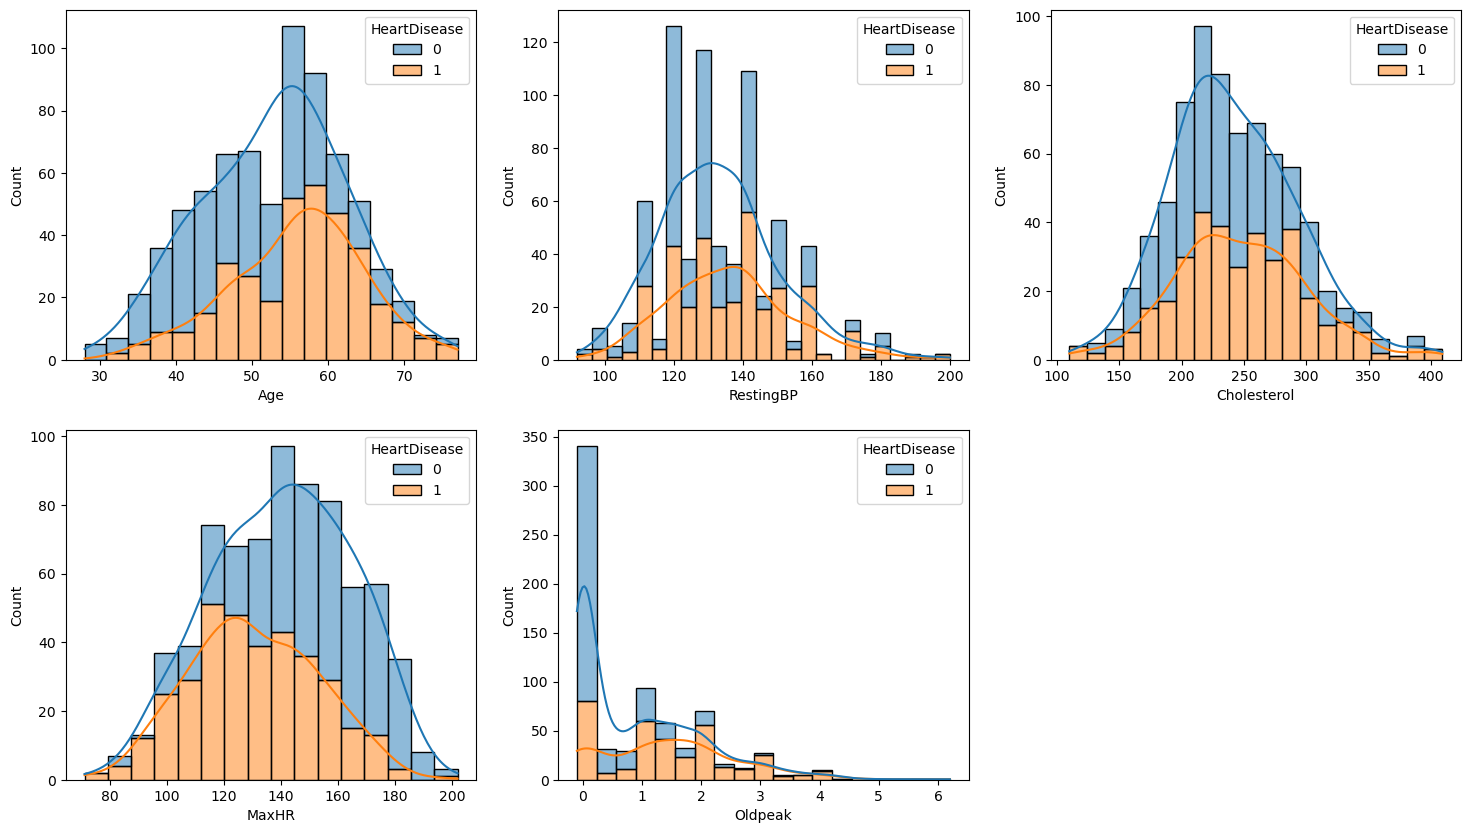

In [414]:
fig,axes = plt.subplots(2,3,figsize= (18,10))
sns.histplot(ax = axes[0,0], data = new_df, x = "Age",hue = "HeartDisease", multiple='stack',kde = True)
sns.histplot(ax = axes[0,1], data = new_df, x = "RestingBP",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[0,2], data = new_df, x = "Cholesterol",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,0], data = new_df, x = "MaxHR",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,1], data = new_df, x = "Oldpeak",hue = "HeartDisease",multiple='stack',kde = True);
axes.flat[-1].set_visible(False)
plt.show()

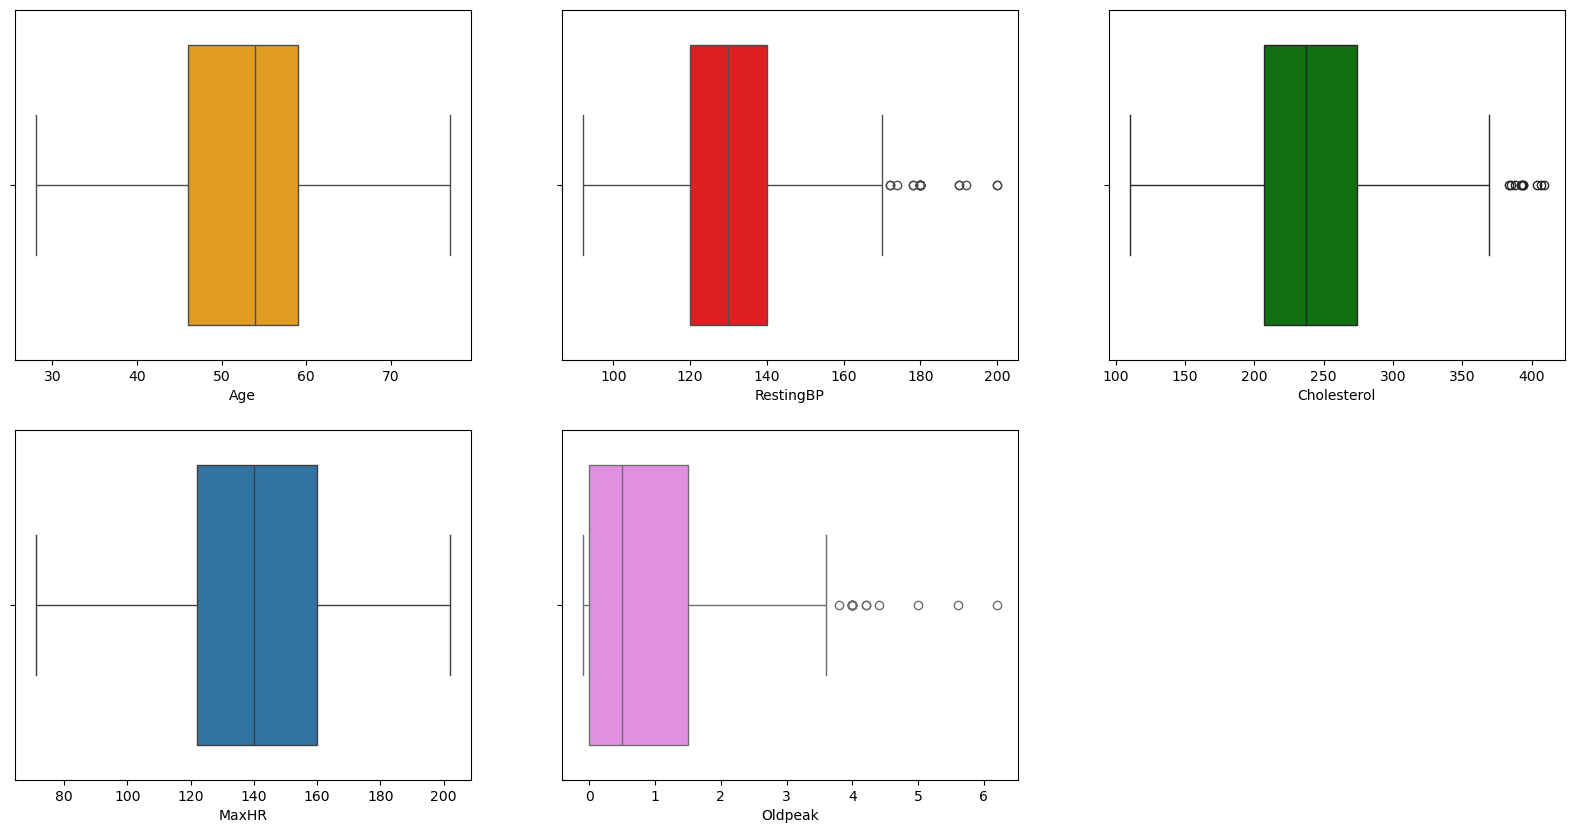

In [415]:
fig,axes = plt.subplots(2,3,figsize= (20,10))
sns.boxplot(ax = axes[0,0], data = new_df, x = "Age",color='orange')
sns.boxplot(ax = axes[0,1], data = new_df, x = "RestingBP",color='red')
sns.boxplot(ax = axes[0,2], data = new_df, x = "Cholesterol",color='green')
sns.boxplot(ax = axes[1,0], data = new_df, x = "MaxHR")
sns.boxplot(ax = axes[1,1], data = new_df, x = "Oldpeak",color='violet');
axes.flat[-1].set_visible(False)

### Xu ly diem ngoai lai cho cot RestingBP

In [417]:
upper_limit = new_df['RestingBP'].quantile(0.99)
lower_limit = new_df['RestingBP'].quantile(0.005)

In [418]:
upper_limit , lower_limit

(180.0, 97.32)

In [419]:
new_df = new_df.loc[(new_df['RestingBP']<=upper_limit) & (new_df['RestingBP']>=lower_limit)]

<Axes: ylabel='RestingBP'>

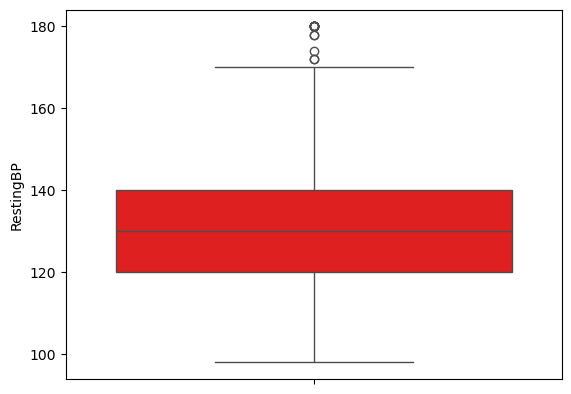

In [420]:
sns.boxplot(new_df["RestingBP"],color='red')

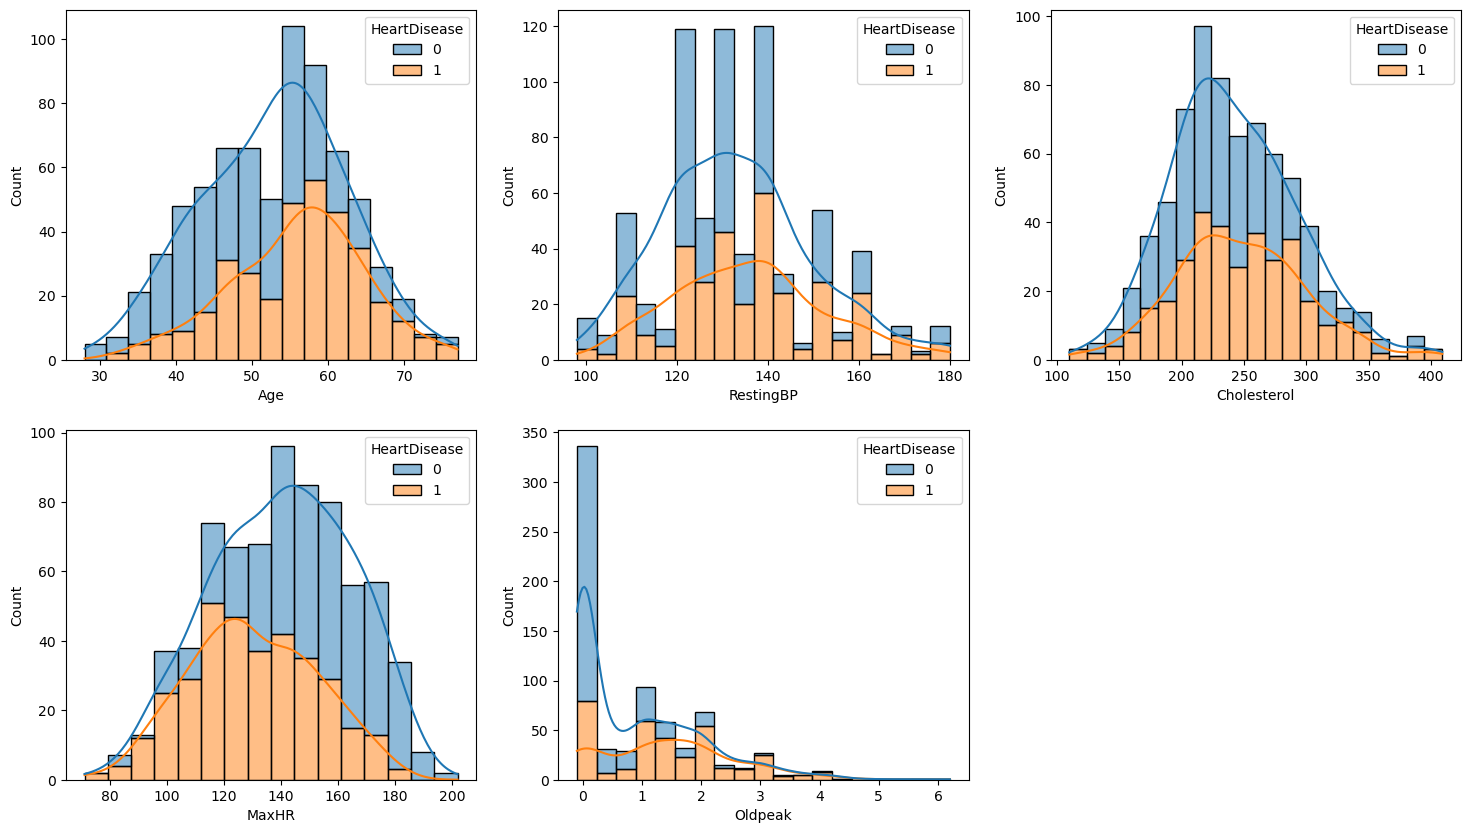

In [421]:
fig,axes = plt.subplots(2,3,figsize= (18,10))
sns.histplot(ax = axes[0,0], data = new_df, x = "Age",hue = "HeartDisease", multiple='stack',kde = True)
sns.histplot(ax = axes[0,1], data = new_df, x = "RestingBP",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[0,2], data = new_df, x = "Cholesterol",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,0], data = new_df, x = "MaxHR",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,1], data = new_df, x = "Oldpeak",hue = "HeartDisease",multiple='stack',kde = True);
axes.flat[-1].set_visible(False)
plt.show()

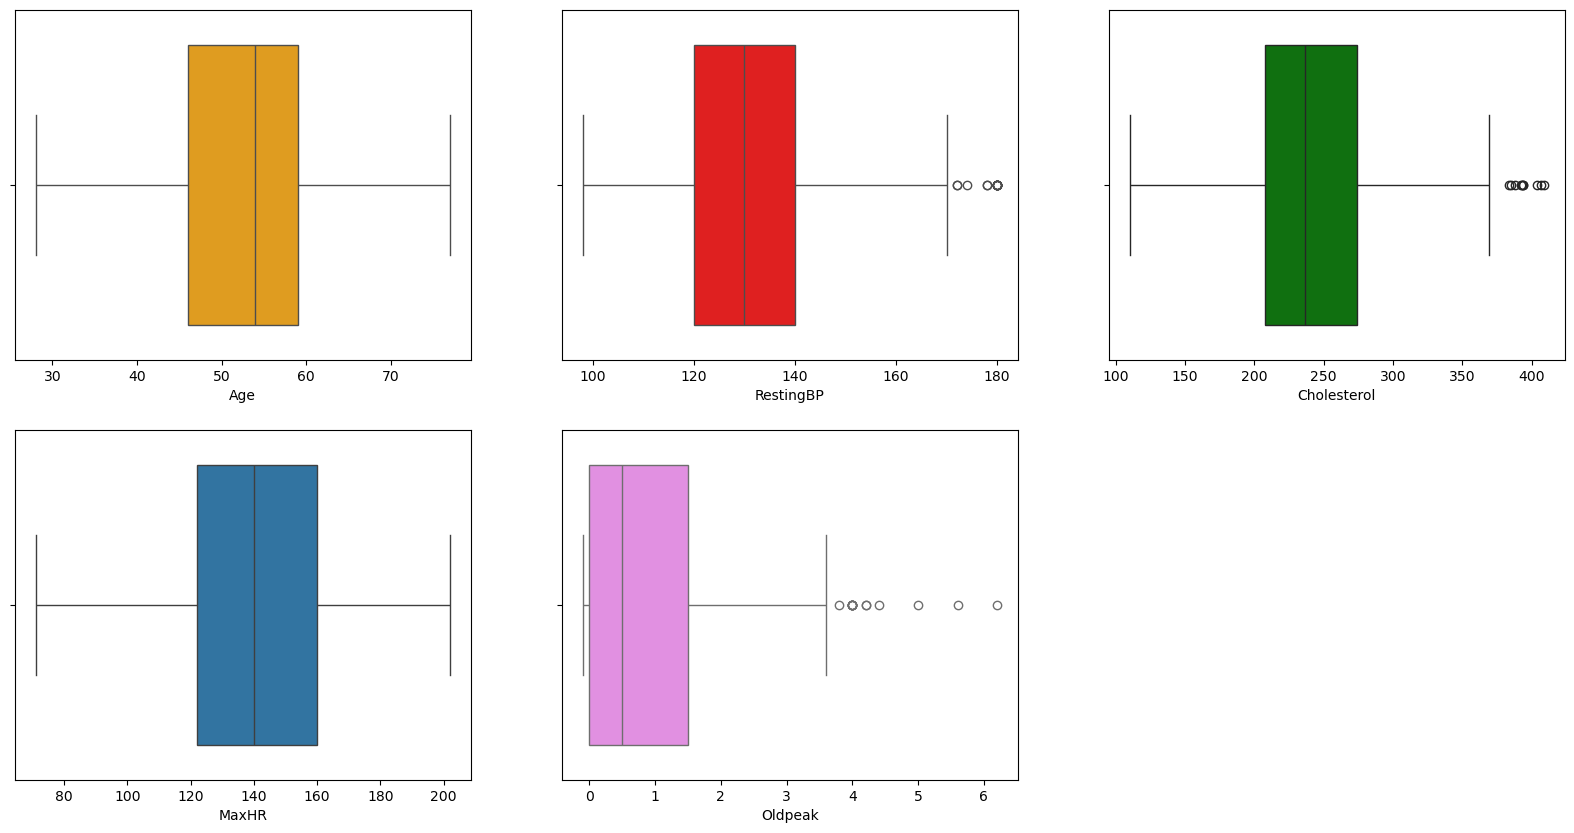

In [422]:
fig,axes = plt.subplots(2,3,figsize= (20,10))
sns.boxplot(ax = axes[0,0], data = new_df, x = "Age",color='orange')
sns.boxplot(ax = axes[0,1], data = new_df, x = "RestingBP",color='red')
sns.boxplot(ax = axes[0,2], data = new_df, x = "Cholesterol",color='green')
sns.boxplot(ax = axes[1,0], data = new_df, x = "MaxHR")
sns.boxplot(ax = axes[1,1], data = new_df, x = "Oldpeak",color='violet');
axes.flat[-1].set_visible(False)

### Xu ly diem ngoai lai cho cot Oldpeak

In [424]:
upper_limit = new_df['Oldpeak'].quantile(0.99)
lower_limit = new_df['Oldpeak'].quantile(0.1)

In [425]:
upper_limit , lower_limit

(4.0, 0.0)

In [426]:
new_df = new_df.loc[(new_df['Oldpeak']<=upper_limit) & (new_df['Oldpeak']>=lower_limit)]

<Axes: ylabel='Oldpeak'>

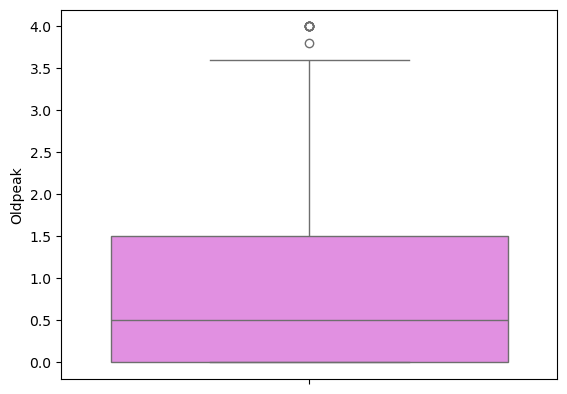

In [427]:
sns.boxplot(new_df["Oldpeak"],color='violet')

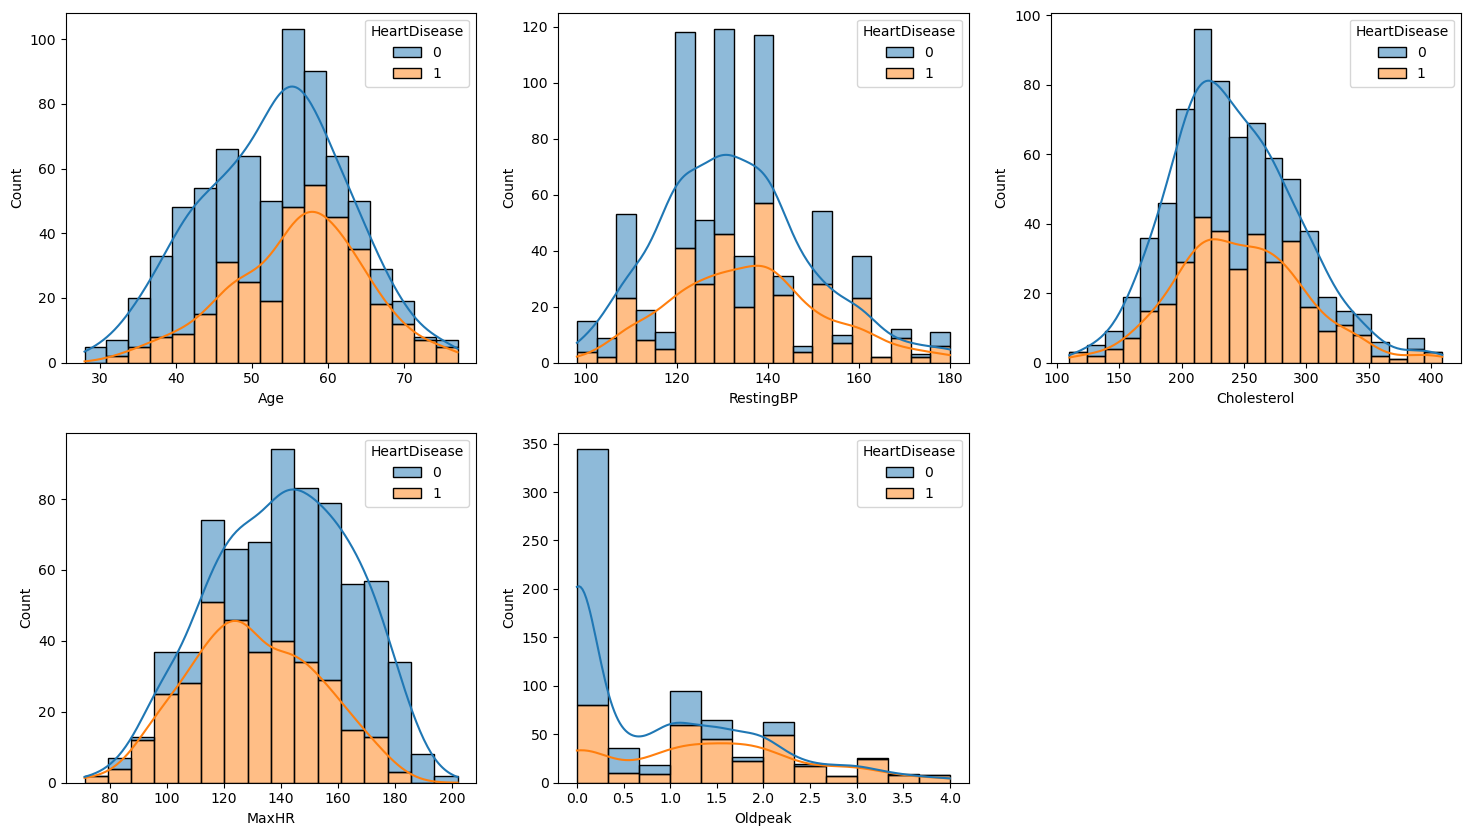

In [428]:
fig,axes = plt.subplots(2,3,figsize= (18,10))
sns.histplot(ax = axes[0,0], data = new_df, x = "Age",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[0,1], data = new_df, x = "RestingBP",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[0,2], data = new_df, x = "Cholesterol",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,0], data = new_df, x = "MaxHR",hue = "HeartDisease",multiple='stack',kde = True)
sns.histplot(ax = axes[1,1], data = new_df, x = "Oldpeak",hue = "HeartDisease",multiple='stack',kde = True);
axes.flat[-1].set_visible(False)
plt.show()

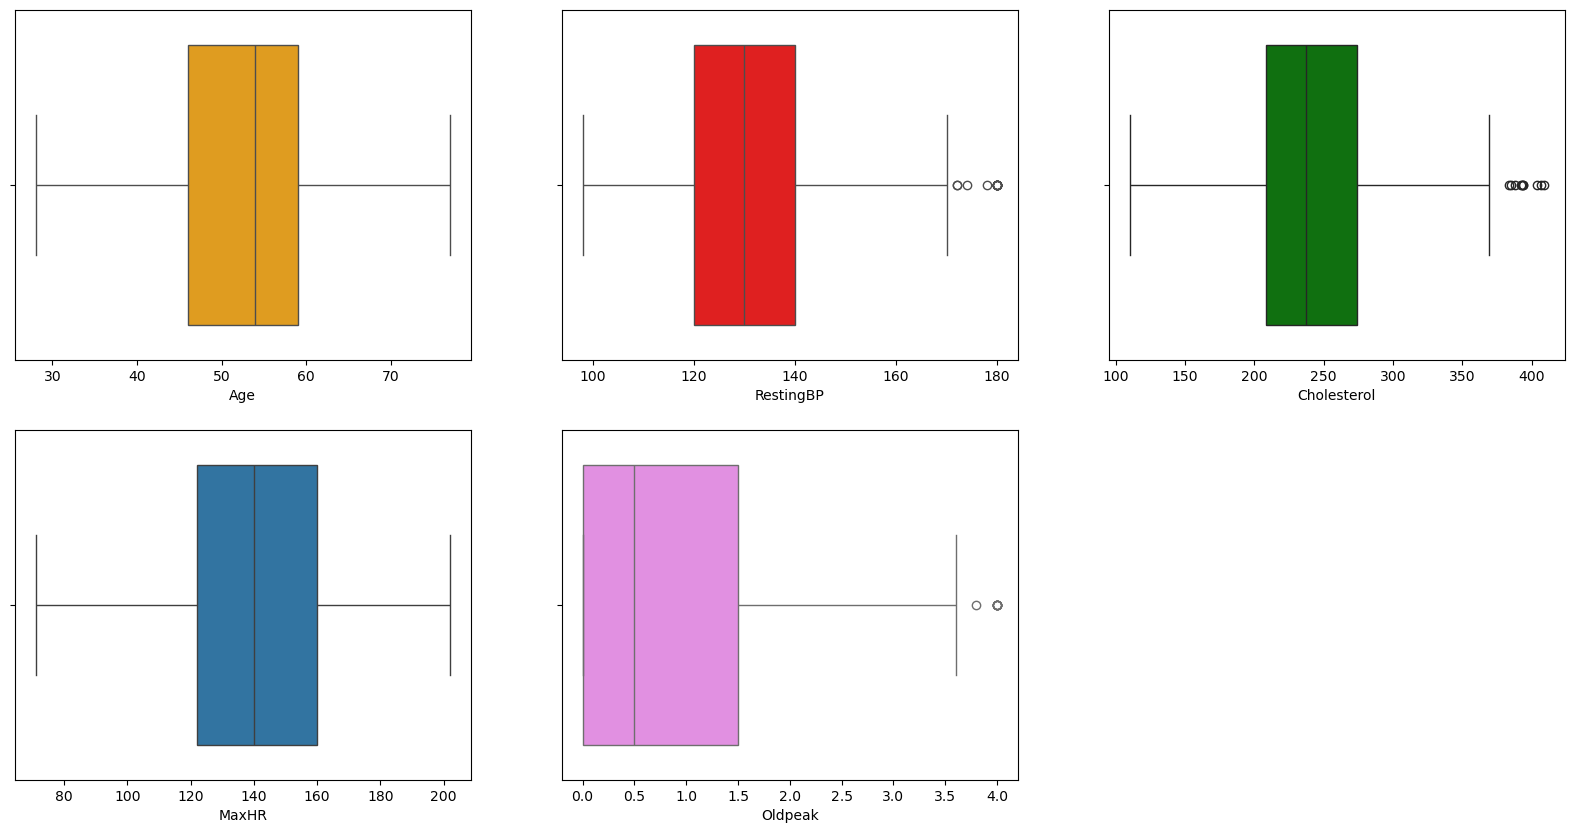

In [429]:
fig,axes = plt.subplots(2,3,figsize= (20,10))
sns.boxplot(ax = axes[0,0], data = new_df, x = "Age",color='orange')
sns.boxplot(ax = axes[0,1], data = new_df, x = "RestingBP",color='red')
sns.boxplot(ax = axes[0,2], data = new_df, x = "Cholesterol",color='green')
sns.boxplot(ax = axes[1,0], data = new_df, x = "MaxHR")
sns.boxplot(ax = axes[1,1], data = new_df, x = "Oldpeak",color='violet');
axes.flat[-1].set_visible(False)

### Tong so outlier da loai bo

In [431]:
print(f'So outlier da loai bo la: {len(df)-len(new_df)}')

So outlier da loai bo la: 201


### Bang du lieu moi sau khi da loai bo outlier

In [433]:
new_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [434]:
new_df.shape

(717, 12)

In [435]:
new_df['HeartDisease'].value_counts().to_frame()

,count
HeartDisease,
0,378
1,339


In [436]:
new_df['HeartDisease'].value_counts(normalize=True)

HeartDisease
0    0.527197
1    0.472803
Name: proportion, dtype: float64

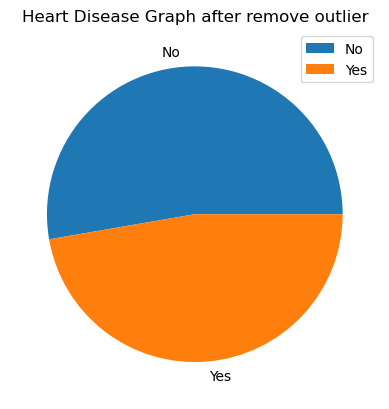

In [437]:
plt.pie(new_df['HeartDisease'].value_counts(),labels=['No','Yes']);
plt.title("Heart Disease Graph after remove outlier")
plt.legend()
plt.show()

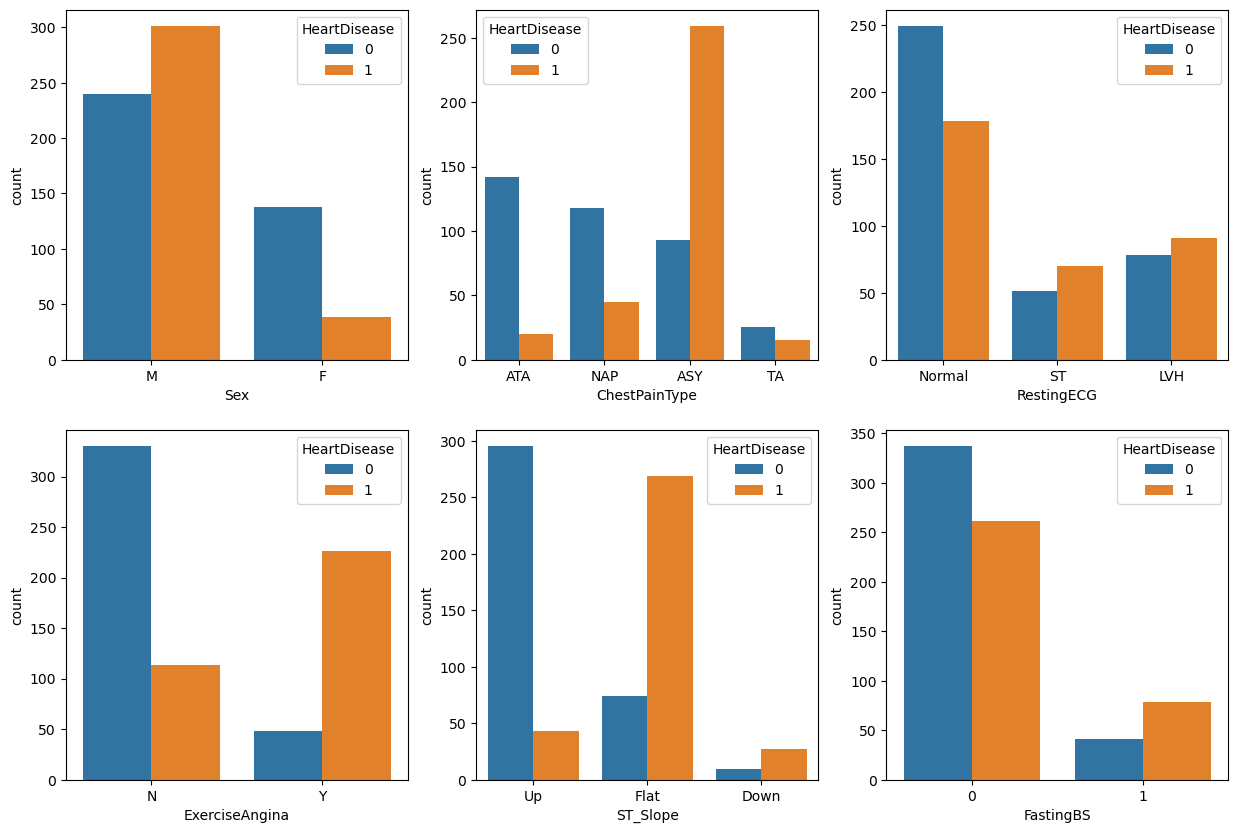

In [438]:
fig,axes = plt.subplots(2,3,figsize= (15,10))
sns.countplot(ax = axes[0,0], data = new_df, x = "Sex",hue = "HeartDisease")
sns.countplot(ax = axes[0,1], data = new_df, x = "ChestPainType",hue = "HeartDisease")
sns.countplot(ax = axes[0,2], data = new_df, x = "RestingECG",hue = "HeartDisease")
sns.countplot(ax = axes[1,0], data = new_df, x = "ExerciseAngina",hue = "HeartDisease")
sns.countplot(ax = axes[1,1], data = new_df, x = "ST_Slope",hue = "HeartDisease")
sns.countplot(ax = axes[1,2], data = new_df, x = "FastingBS",hue = "HeartDisease");
plt.show()

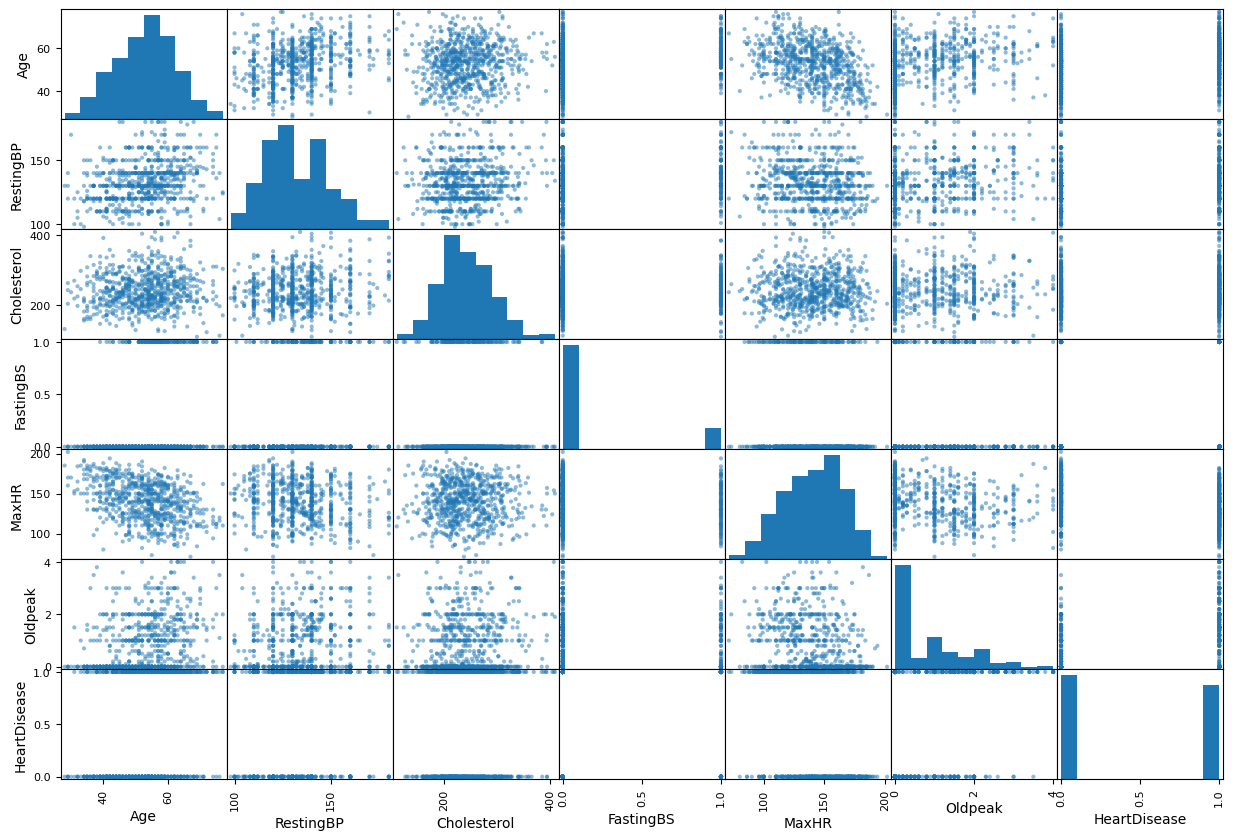

In [439]:
scatter_matrix(new_df,figsize=(15,10));

### Bien doi du lieu

In [441]:
columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
for column in columns:
    print(column,":",new_df[column].unique())

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
FastingBS : [0 1]
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']
HeartDisease : [0 1]


In [442]:
for column in columns:
    new_df[column] = new_df[column].astype('category')

In [443]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             717 non-null    int64   
 1   Sex             717 non-null    category
 2   ChestPainType   717 non-null    category
 3   RestingBP       717 non-null    int64   
 4   Cholesterol     717 non-null    int64   
 5   FastingBS       717 non-null    category
 6   RestingECG      717 non-null    category
 7   MaxHR           717 non-null    int64   
 8   ExerciseAngina  717 non-null    category
 9   Oldpeak         717 non-null    float64 
 10  ST_Slope        717 non-null    category
 11  HeartDisease    717 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 39.5 KB


In [444]:
new_df.describe(include=['category'])

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,717,717,717,717,717,717,717
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,0
freq,541,352,598,427,443,343,378


### Ma hoa du lieu roi rac

In [446]:
from sklearn.preprocessing import LabelEncoder
columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','FastingBS','HeartDisease']
def encoder(columns):
    for column in columns:
        lbe = LabelEncoder()
        new_df[column] = lbe.fit_transform(new_df[column])

In [447]:
encoder(columns)
for column in columns:
    print(column,":",new_df[column].unique())

Sex : [1 0]
ChestPainType : [1 2 0 3]
RestingECG : [1 2 0]
ExerciseAngina : [0 1]
ST_Slope : [2 1 0]
FastingBS : [0 1]
HeartDisease : [0 1]


### Thay doi cot du lieu

In [449]:
columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','FastingBS','HeartDisease']
result_df = pd.DataFrame(new_df,columns=columns)

In [450]:
result_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,40,140,289,172,0.0,1,1,1,0,2,0,0
1,49,160,180,156,1.0,0,2,1,0,1,0,1
2,37,130,283,98,0.0,1,1,2,0,2,0,0
3,48,138,214,108,1.5,0,0,1,1,1,0,1
4,54,150,195,122,0.0,1,2,1,0,2,0,0


In [451]:
result_df.shape

(717, 12)

In [452]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             717 non-null    int64  
 1   RestingBP       717 non-null    int64  
 2   Cholesterol     717 non-null    int64  
 3   MaxHR           717 non-null    int64  
 4   Oldpeak         717 non-null    float64
 5   Sex             717 non-null    int32  
 6   ChestPainType   717 non-null    int32  
 7   RestingECG      717 non-null    int32  
 8   ExerciseAngina  717 non-null    int32  
 9   ST_Slope        717 non-null    int32  
 10  FastingBS       717 non-null    int64  
 11  HeartDisease    717 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 58.8 KB


In [453]:
result_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,40,140,289,172,0.0,1,1,1,0,2,0,0
1,49,160,180,156,1.0,0,2,1,0,1,0,1
2,37,130,283,98,0.0,1,1,2,0,2,0,0
3,48,138,214,108,1.5,0,0,1,1,1,0,1
4,54,150,195,122,0.0,1,2,1,0,2,0,0


In [454]:
result_df.dtypes

Age                 int64
RestingBP           int64
Cholesterol         int64
MaxHR               int64
Oldpeak           float64
Sex                 int32
ChestPainType       int32
RestingECG          int32
ExerciseAngina      int32
ST_Slope            int32
FastingBS           int64
HeartDisease        int64
dtype: object

In [455]:
columns = ['Oldpeak']
for column in columns:
    result_df[column] = result_df[column].astype('float64')

In [456]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             717 non-null    int64  
 1   RestingBP       717 non-null    int64  
 2   Cholesterol     717 non-null    int64  
 3   MaxHR           717 non-null    int64  
 4   Oldpeak         717 non-null    float64
 5   Sex             717 non-null    int32  
 6   ChestPainType   717 non-null    int32  
 7   RestingECG      717 non-null    int32  
 8   ExerciseAngina  717 non-null    int32  
 9   ST_Slope        717 non-null    int32  
 10  FastingBS       717 non-null    int64  
 11  HeartDisease    717 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 58.8 KB


### Phân tách dữ liệu và chuẩn hóa dữ liệu

In [458]:
X = result_df.iloc[:,:-1]
y = result_df.iloc[:,-1]

In [459]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.4,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size=0.5,random_state=42)

In [460]:
X_train.shape,X_val.shape,X_test.shape

((430, 11), (143, 11), (144, 11))

### Chuan hoa du lieu train,val,test bang phuong phap standarscaler

In [462]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [463]:
X_train.iloc[:,0:5] = scaler.fit_transform(X_train.iloc[:,0:5])

In [464]:
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
133,0.338335,1.004959,-0.236517,-0.702177,0.675273,1,0,2,1,1,0
784,1.292678,0.276032,0.787795,1.318274,0.572633,1,3,0,0,1,1
432,1.080602,2.219838,-1.280527,-2.318538,1.701668,1,0,1,1,0,0
251,-0.509969,-0.817359,0.354432,-1.065858,1.188470,1,0,1,0,1,0
0,-1.358274,0.397520,0.925683,1.237456,-0.864320,1,1,1,0,2,0


In [465]:
X_val.iloc[:,0:5] = scaler.transform(X_val.iloc[:,0:5])

In [466]:
X_val.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
897,0.232297,-0.331408,-0.728975,-0.459723,1.18847,0,0,2,1,1,0
556,2.353059,1.612398,1.339347,-1.187085,1.18847,1,0,1,1,0,1
91,-1.464312,-0.209920,1.280252,-0.055633,-0.86432,1,0,1,0,2,0
116,-1.570350,-0.817359,0.787795,1.156638,-0.86432,1,0,1,0,1,0
910,-1.252236,-0.817359,-1.674493,1.641546,-0.86432,1,1,1,0,2,0


In [467]:
X_test.iloc[:,0:5] = scaler.transform(X_test.iloc[:,0:5])

In [468]:
X_test.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
854,-0.085817,-0.817359,1.634822,1.237456,-0.659041,1,1,1,0,2,0
35,-2.206579,-0.513639,0.236242,0.550502,-0.864320,1,1,1,0,2,0
58,0.126259,1.004959,2.422754,-0.298087,0.162075,1,0,2,0,2,0
234,0.126259,0.397520,1.319649,-0.055633,-0.864320,0,1,2,0,2,0
490,2.034945,-0.817359,-0.551690,-1.591176,0.162075,1,2,1,1,1,0


In [469]:
X_test.shape

(144, 11)

In [470]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [557]:
seed = 2024
models = {
    "Decision Tree":DecisionTreeClassifier(random_state=seed),
    "KNN":KNeighborsClassifier(metric='minkowski',p=2),
    "LogisticRegression":LogisticRegression(solver='liblinear',max_iter=1200,random_state=seed),
    "SVM":SVC(random_state=seed),
    "LinearSVC":LinearSVC(max_iter=12000,random_state=seed),
    "RandomForest":RandomForestClassifier(criterion='entropy',random_state=seed),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=seed),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=seed)
}
for name,model in models.items():
    print(f"Training model {name}...")
    model = model.fit(X_train,y_train)
    # y_pred = model.predict(X_test)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred)
    print(f"\t{name} accuracy_score in train set: {model.score(X_train,y_train)}\n")
    print(f"\t{name} accuracy_score in val set: {accuracy}\n")
    print(f"\t Classification report {name}")
    print(classification_report(y_val,y_pred))
    print("*"*60)

Training model Decision Tree...
	Decision Tree accuracy_score in train set: 1.0

	Decision Tree accuracy_score in val set: 0.7902097902097902

	 Classification report Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        78
           1       0.75      0.80      0.78        65

    accuracy                           0.79       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.79      0.79      0.79       143

************************************************************
Training model KNN...
	KNN accuracy_score in train set: 0.8651162790697674

	KNN accuracy_score in val set: 0.8041958041958042

	 Classification report KNN
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        78
           1       0.81      0.74      0.77        65

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
wei

### Cross-Validate

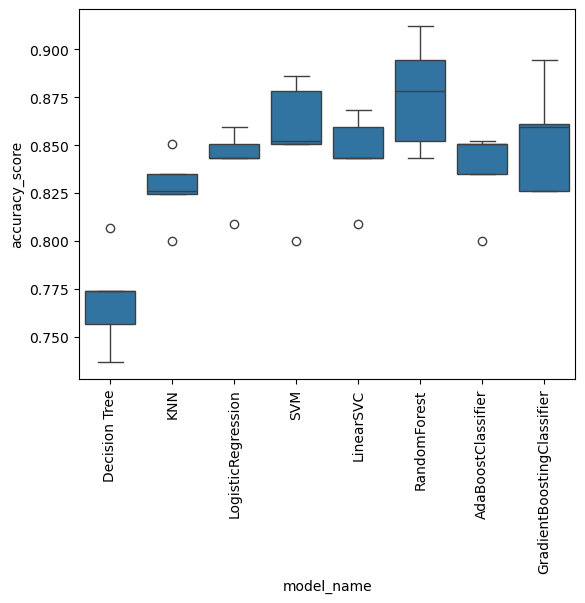

,Mean,Std
model_name,,
RandomForest,0.876186,0.028713
GradientBoostingClassifier,0.853486,0.028703
SVM,0.853455,0.033682
LinearSVC,0.844744,0.022833
LogisticRegression,0.841236,0.019371
AdaBoostClassifier,0.837742,0.022285
KNN,0.827262,0.018481
Decision Tree,0.769641,0.025891


In [560]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
def models_results(models,X_train,y_train,X_val,y_val,metrics,cv=5,plot_results=False):
    k_fold = StratifiedKFold(cv,shuffle=True,random_state=seed)
    entries = []
    X = pd.concat([X_train,X_val],axis=0,ignore_index=True)
    y = pd.concat([y_train,y_val],axis=0,ignore_index=True)
    for name,model in models.items():
        scores = cross_val_score(model,X,y,scoring=metrics,cv=k_fold)
        for fold_idx,score in enumerate(scores):
            entries.append((name,fold_idx,score))
    cv_df = pd.DataFrame(entries,columns=['model_name','fold_id','accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name',y ='accuracy_score',data=cv_df)
        plt.xticks(rotation=90)
        plt.show()
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std =  cv_df.groupby('model_name')['accuracy_score'].std()
    models_accuracy_result = pd.concat([mean,std],axis=1)
    models_accuracy_result.columns = ['Mean','Std']
    models_accuracy_result.sort_values(by=['Mean'],ascending=False,inplace=True)
    return models_accuracy_result
models_results(models,X_train,y_train,X_val,y_val,metrics='accuracy',cv=5,plot_results=True)

### Chon model tot nhat: RandomForestClassifier

In [563]:
from sklearn.model_selection import GridSearchCV

In [565]:
model = RandomForestClassifier(criterion='entropy',random_state=seed)

In [567]:
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
# accuracy_train_set = accuracy_score(y_train,y_pred_train)
accuracy_train_set = model.score(X_train,y_train)
print(f"\t{'RandomForestClassifier'} accuracy_score in Train set: {accuracy_train_set}\n")
y_pred_val = model.predict(X_val)
accuracy_val_set = accuracy_score(y_val,y_pred_val)
print(f"\t{'RandomForestClassifier'} accuracy_score in Val set: {accuracy_val_set}\n")
print(classification_report(y_val,y_pred_val))

	RandomForestClassifier accuracy_score in Train set: 1.0

	RandomForestClassifier accuracy_score in Val set: 0.8741258741258742

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        78
           1       0.83      0.91      0.87        65

    accuracy                           0.87       143
   macro avg       0.87      0.88      0.87       143
weighted avg       0.88      0.87      0.87       143



### Tim Sieu Tham So

In [527]:
model2 = RandomForestClassifier(criterion='entropy',random_state=seed)
param_grid = {
    'n_estimators': [100, 200, 300, 500],  
    'max_depth': [None, 10, 20, 30, 40],   
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4], 
}

In [529]:
grid_search = GridSearchCV(
    estimator=model2,        
    param_grid=param_grid,   
    scoring='accuracy',      
    cv=5,                    
    n_jobs=-1,               
    verbose=1                
)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print("Val accuracy: {:.2f}".format(val_accuracy))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best cross-validation accuracy: 0.87
Val accuracy: 0.87


In [531]:
y_val_pred = best_model.predict(X_val)

In [533]:
print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        72
           1       0.91      0.83      0.87        71

    accuracy                           0.87       143
   macro avg       0.88      0.87      0.87       143
weighted avg       0.88      0.87      0.87       143



Chieu sau toi da cua cay la: 9


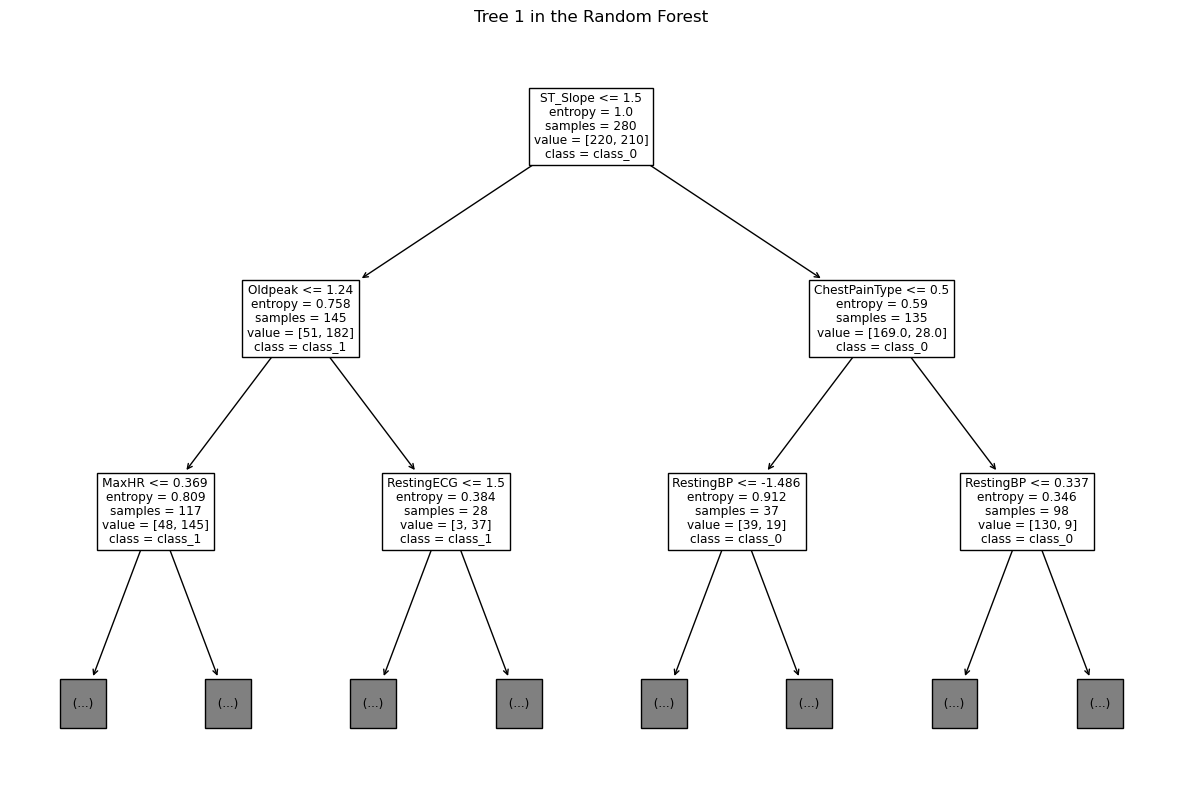

In [535]:
from sklearn.tree import plot_tree
estimator = best_model.estimators_[0]
plt.figure(figsize=(15, 10))
plot_tree(estimator, feature_names=X_train.columns, class_names=["class_0", "class_1"],max_depth=2)
plt.title(f"Tree {1} in the Random Forest")
print(f'Chieu sau toi da cua cay la: {estimator.tree_.max_depth}')
plt.show()

### Do chinh xac Tren tap test

In [538]:
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.88


In [540]:
y_test_pred = best_model.predict(X_test)

In [542]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.92      0.85      0.88        78

    accuracy                           0.88       144
   macro avg       0.88      0.88      0.87       144
weighted avg       0.88      0.88      0.88       144



In [544]:
compare_df = pd.DataFrame({"y_test":y_test,"y_test_pred":y_test_pred})

In [546]:
compare_df.head(10)

,y_test,y_test_pred
854,0,0
35,0,0
58,0,0
234,0,0
490,1,1
494,1,1
716,1,1
595,1,1
725,1,1
660,0,0


In [ ]:
import joblib

joblib.dump(best_model, 'model_randomforest.pkl')